In [1]:
from Functions import *
import winsound

In [2]:
''' Beam parameters '''
N = 1024			# number of sampling points
E0 = 9481			# photon energy [eV]
tau = 400			# pulse duration [fs]
window = 50000		# total simulation time window [fs]

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
	'photonEnergy': E0,
	'N': N,
	'sigma_x': 23e-6,
	'sigma_y': 23e-6,
	'rangeFactor': 5,
	'scaleFactor': 10,
	'z_source': 650-26
}

In [3]:
##### I/O
dir_out = 'output/'; make_dir(dir_out)
dir_ev = dir_out + '{}eV/'.format(E0); make_dir(dir_ev)
dir_case = dir_ev + 'beam_profiles/'; make_dir(dir_case)

print('\nCWD:',dir_case)

path exists
path exists
path exists

CWD: output/9481eV/beam_profiles/


In [4]:
def define_beamline(
    E0, m1_p=185.0, m2_p=175.5,
    HHLM_type='2DCM', HHLM_offset=20e-3, pair_distance=200e-3,
    slit_width=3e-6, f1=10.0, f2=10.0,
    hkl1 = [1,1,1], alphaAsym1 = 9.0,
    hkl2 = [3,3,3], alphaAsym2 = 0.0,
    hkl3 = [4,4,0], alphaAsym3 = 15.0,
    shapeErrors=[None for i in range(6)],
    l_crystal=[1e-1 for i in range(6)],
    w_crystal = [5e-3 for i in range(6)]):
    
    z_s = 650

    # viewing point - upstream of monochromator
    im_input = optics.PPM('im_input', z=184+z_s, FOV=5e-3, N=256)
    
    Telescope_devices = define_Telescope(E0, m1_p=m1_p, m2_p=m2_p)
    
    if HHLM_type == '2DCM':
        HHLM_devices = define_HHLM_2DCM(E0,
                                    HHLM_offset=HHLM_offset,
                                    pair_distance=pair_distance,
                                    hkl1=hkl1, alphaAsym1=alphaAsym1,
                                    hkl2=hkl2, alphaAsym2=alphaAsym2,
                                    shapeErrors=shapeErrors,
                                    l_crystal=l_crystal,
                                    w_crystal = w_crystal)
    elif HHLM_type == 'Zigzag':
        HHLM_devices = define_HHLM_Zigzag(E0,
                                    HHLM_offset=HHLM_offset,
                                    pair_distance=pair_distance,
                                    hkl1=hkl1, alphaAsym1=alphaAsym1,
                                    hkl2=hkl2, alphaAsym2=alphaAsym2,
                                    shapeErrors=shapeErrors,
                                    l_crystal=l_crystal,
                                    w_crystal = w_crystal)
    
    HRM_devices = define_HRM(E0, f1=f1, f2=f2, slit_width=slit_width,
                            hkl=hkl3, alphaAsym=alphaAsym3,
                            shapeErrors=shapeErrors,
                            l_crystal=l_crystal,
                            w_crystal=w_crystal)

    all_devices = [im_input] + Telescope_devices + HHLM_devices + HRM_devices
    
    mono_beamline = beamline.Beamline(all_devices, ordered=True)
    return all_devices, mono_beamline


### Setup beamline and calculate beam profiles at each optics to determine the crystal profiles

In [5]:
##### perfect case
m1_p = 185.0; m2_p = 175.834
slit_width = 1e-1
f1 = 10.0; f2 = 10.0            # f1: crystal-mirror distance, f2: mirror focal distance

HHLM_type = '2DCM'              # 2DCM or Zigzag
HHLM_offset=20e-3
pair_distance=200e-3
hkl1 = [1,1,1]; alphaAsym1 = 9.0    # asymmetry angle for the 1st pair of HHLM crystal
hkl2 = [4,4,0]; alphaAsym2 = 35.0    # ````````````````````````2nd pair of HHLM crystal
hkl3 = [4,4,0]; alphaAsym3 = 15.0   # ````````````````````````2nd and 3rd HRM crystal

shapeErrors = [None for i in range(6)]
l_crystal = [1e-1 for i in range(6)]
w_crystal = [5e-3 for i in range(6)]

mono_devices, mono_beamline = define_beamline(E0,
                               m1_p=m1_p, m2_p=m2_p, HHLM_type=HHLM_type,
                               HHLM_offset=HHLM_offset,
                               pair_distance=pair_distance,
                               slit_width=slit_width, f1=f1, f2=f2,
                               hkl1=hkl1, alphaAsym1=alphaAsym1,
                               hkl2=hkl2, alphaAsym2=alphaAsym2,
                               hkl3=hkl3, alphaAsym3=alphaAsym3,
                               shapeErrors=shapeErrors,
                               l_crystal=l_crystal,
                               w_crystal=w_crystal)

dir_plot = dir_case+'{}_{}_{}/'.format(HHLM_type, hkl1[0]*100+hkl1[1]*10+hkl1[2],
                                      hkl2[0]*100+hkl2[1]*10+hkl2[2]); make_dir(dir_plot)
dir_plot += '{}_{}_deg_{}mm_offset/'.format(alphaAsym1, alphaAsym2, 1e3*HHLM_offset); make_dir(dir_plot)


b 0.15
b 6.76
b 0.14
b 7.08
b 1.00
b 1.81
slit width: 100000.0 um
b 0.55
b 1.00
make path
make path


In [6]:
beam_offsets = []
for device in mono_devices:
    print(device.name)
    print('  x:{}, y:{}, z:{}\n'.format(device.global_x, device.global_y, device.z))
    if device.name == 'HHLM1':
        beam_offsets.append(device.global_x)
    if device.name == 'HHLM2':
        beam_offsets.append(device.global_x)

beam_offset = (beam_offsets[-1]-beam_offsets[0])*1e3
print('beam_offset: {}mm'.format(beam_offset, 2))
print('distance factor for 20mm: {}'.format(20/beam_offset))

im_input
  x:0, y:0, z:834

M1
  x:0.0, y:0.0, z:835

im_after_T1
  x:5.3000496262194466e-05, y:0.0, z:835.01

M2
  x:0.6095057070157908, y:0.0, z:950

im_after_T2
  x:0.6095057070157908, y:0.0, z:950.01

HHLM1
  x:0.6095057070157908, y:0.0, z:955

im_after_HHLM1
  x:0.6099526019937439, y:0.0, z:955.001

HHLM2
  x:0.629500629189023, y:0.0, z:955.0447418815587

im_after_HHLM2
  x:0.6295005814874671, y:0.0, z:955.0457418815587

HHLM3
  x:0.6294910888778436, y:0.0, z:955.2447418815588

im_after_HHLM3
  x:0.6156767994759447, y:0.0, z:955.2457418815587

HHLM4
  x:0.6094958867501646, y:0.0, z:955.2461893104887

im_after_HHLM4
  x:0.6094960574476458, y:0.0, z:955.2471893104887

C1
  x:0.6103073502606041, y:0.0, z:960

im_after_C1
  x:0.6241449760816089, y:0.0, z:960.001

C2
  x:1.3021886413265757, y:0.0, z:960.05

im_after_C2
  x:1.3021887845914488, y:0.0, z:960.0509999999999

im_before_MIR1
  x:1.303621146793047, y:0.0, z:970.049

mir1
  x:1.30362129005792, y:0.0, z:970.05

im_after_MIR1
  x

In [7]:
%%capture capt
# list of crystals
crystals = np.array(['HHLM1', 'HHLM2', 'HHLM3', 'HHLM4', 'C1', 'C2']); n_crys = len(crystals)

b1 = beam.Beam(beam_params=beam_params)
b2 = mono_beamline.propagate_beamline(b1)


wx1, wy1 = mono_beamline.im_after_HHLM1.beam_analysis(mono_beamline.im_after_HHLM1.get_profile_x(), mono_beamline.im_after_HHLM1.get_profile_y())[2:4]
wx2, wy2 = mono_beamline.im_after_HHLM2.beam_analysis(mono_beamline.im_after_HHLM2.get_profile_x(), mono_beamline.im_after_HHLM2.get_profile_y())[2:4]
wx3, wy3 = mono_beamline.im_after_HHLM3.beam_analysis(mono_beamline.im_after_HHLM3.get_profile_x(), mono_beamline.im_after_HHLM3.get_profile_y())[2:4]
wx4, wy4 = mono_beamline.im_after_HHLM4.beam_analysis(mono_beamline.im_after_HHLM4.get_profile_x(), mono_beamline.im_after_HHLM4.get_profile_y())[2:4]
wx5, wy5 = mono_beamline.im_after_C1.beam_analysis(mono_beamline.im_after_C1.get_profile_x(), mono_beamline.im_after_C1.get_profile_y())[2:4]
wx6, wy6 = mono_beamline.im_after_C2.beam_analysis(mono_beamline.im_after_C2.get_profile_x(), mono_beamline.im_after_C2.get_profile_y())[2:4]

beta0s = []
for device in mono_devices:
    if device.name in crystals:
        beta0s.append(device.beta0)

# crystal lengths (long) and widths (short) [m]
beam_size = np.array([wx1, wx2, wx3, wx4, wx5, wx6])    # FWHM
l_crystal = np.divide(beam_size*2, np.sin(beta0s))
w_crystal = np.array([wy1, wy2, wy3, wy4, wy5, wy6])*2


In [8]:
##### calculate crystal properties to calculate beam power
braggs = []
asyms = []

for device in mono_devices:
    if device.name in crystals:
        braggs.append(np.rad2deg(device.bragg))
        asyms.append(np.rad2deg(device.alphaAsym))
print('beam size[mm]: {}'.format(beam_size*1e3))
print('bragg angle', np.round(braggs,3))
print('asymmetry', asyms)
print('footprint [mm]',l_crystal*1e3/2)

beam size[mm]: [8.85483878 1.31018353 9.28714484 1.31170546 1.31200369 0.72532428]
bragg angle [12.043 12.037 42.93  42.928 42.928 42.928]
asymmetry [-9.0, 9.0, -35.0, 35.0, 0.0, 14.999999999999998]
footprint [mm] [24.66718214 24.66524837  9.4972192   9.4942267   1.92634621  1.54853315]


### Calculate slit width

In [9]:
%%capture capt
mono_devices, mono_beamline = define_beamline(E0,
                               m1_p=m1_p, m2_p=m2_p, HHLM_type=HHLM_type,
                               slit_width=slit_width, f1=f1, f2=f2,
                               hkl1=hkl1, alphaAsym1=alphaAsym1,
                               hkl2=hkl2, alphaAsym2=alphaAsym2,
                               hkl3=hkl3, alphaAsym3=alphaAsym3,
                               shapeErrors=[None for i in range(6)],
                               l_crystal=l_crystal,
                               w_crystal=w_crystal)

''' propagate '''
beam_params['photonEnergy'] = E0
b1 = beam.Beam(beam_params=beam_params)
b2 = mono_beamline.propagate_beamline(b1)


In [10]:
def calc_slit_width(inbeam, lmbd, foc):
    # inbeam is the beamsize (2x FWHM) after Crystal 2
    # lmbd is wavelength of photon
    # asym is asymmetry angle of Crystal 2
    # foc is Mir1/Lens1 focal distance
    # returns mono focus size in [m] at the Fourier plane
    slt = 2*np.log(2)*lmbd*foc/np.pi/inbeam
    return 2.11 * slt    # 2x FWHM with some error (~factor of 5%)

wx = mono_beamline.im_after_C2.beam_analysis(mono_beamline.im_after_C2.get_profile_x(), mono_beamline.im_after_C2.get_profile_y())[2]
slit_width = calc_slit_width(wx*2, b2.lambda0, mono_beamline.mir1.q)
print('calculated slit width: {}um'.format(round(slit_width*1e6,2)))

if slit_width < 3e-6:
    slit_width = 3e-6
    
print('actual slit width: {}um\n'.format(round(slit_width*1e6,2)))


calculated slit width: 0.84um
actual slit width: 3.0um



### Loading shapeErrors

HHLM1_29.98W_HHLM2_1.18W_HHLM3_12.8W_HHLM4_0.058W_C1_0.744W_C2_0.018W_
(5637, 2)
(5637, 2)
(4517, 2)
(4517, 2)
(1157, 2)
(1157, 2)


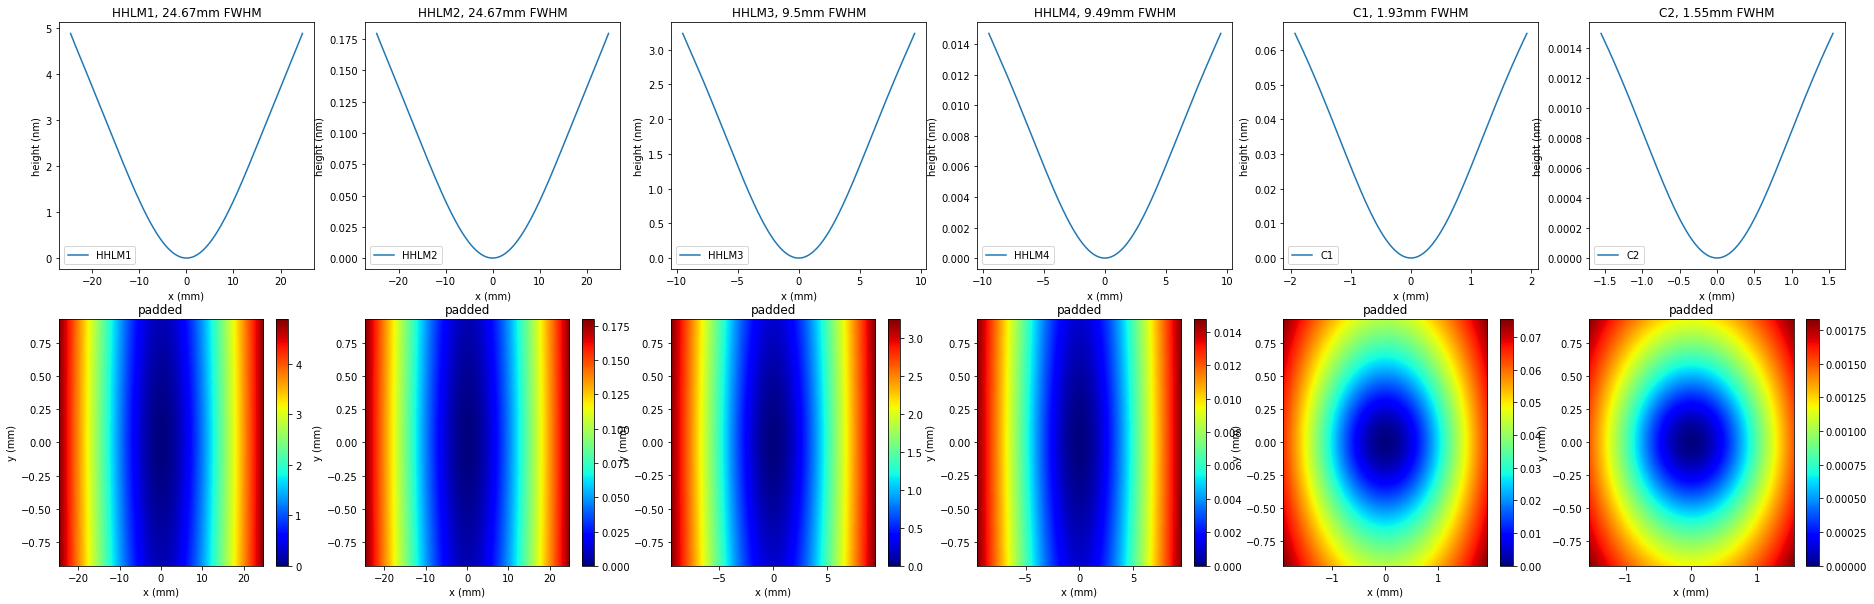

In [12]:
# crystal_powers = np.array([29.98, 1.18, 10.23, 0.5200, 2.8455, 0.0184])    # crytal power for 2DCM-111-311
# crystal_powers = np.array([29.98, 1.18, 11.85, 0.3033, 1.4458, 0.0182])    # crytal power for 2DCM-111-331
# crystal_powers = np.array([29.98, 1.18, 12.57, 0.2171, 0.8176, 0.0180])    # crytal power for 2DCM-111-333
crystal_powers = np.array([29.98, 1.18, 12.80, 0.0581, 0.7439, 0.0180])    # crytal power for 2DCM-111-440

# crystal_powers *= np.array([0,0,0,0,0,1])

def load_crystal_data(dir_profile, crystal_name, option):
    coords = np.loadtxt(dir_profile+'Nlist_{}_{}.txt'.format(option, crystal_name), skiprows=12)
    data = np.loadtxt(dir_profile+'Uy_list_{}_{}.txt'.format(option, crystal_name), skiprows=0)

    x = coords[:,1]
    y = coords[:,2]
    z = coords[:,3]
    dy = data[:,1]
    print(data.shape)
    # plt.figure()
    # plt.plot(x)
    # plt.figure()
    # plt.plot(z)

    xx = np.linspace(np.min(x), np.max(x), 1024)
    zz = np.linspace(np.min(z), np.max(z), 1024)
    xx,zz = np.meshgrid(xx,zz)

    # f = interpolate.interp2d(z,x,dy)
    dy2 = interpolate.griddata((x,z),dy,(xx,zz), fill_value=0)

    dy_symmetrize = np.concatenate((dy2,np.flipud(dy2)),axis=0)
    dy_symmetrize = np.concatenate((dy_symmetrize,np.fliplr(dy_symmetrize)),axis=1)

    xx2 = np.linspace(np.min(x), -np.min(x), 2048)
    zz2 = np.linspace(np.min(z), -np.min(z), 2048)
    xx2,zz2 = np.meshgrid(xx2,zz2)
    
    return dy_symmetrize, xx2, zz2

# get file name based on crystal powers
for i in range(n_crys):
    if i == 0:
        fname_error = ''
    if crystal_powers[i] != 0:
        fname_error += '{}_{}W_'.format(crystals[i], round(crystal_powers[i],3))
print(fname_error)

# directories
dir_profile = '../DXS_Xtals_FEA4WFS/{}/'.format(HHLM_type)

# holders
shapeErrors = [None for i in range(n_crys)]
x_mirs      = [None for i in range(n_crys)]
y_mirs      = [None for i in range(n_crys)]

if HHLM_type == 'Zigzag':
    crystal_profile_powers = np.array([
        [73.15, 16.53, 0.029, 0.027, 0.026, 0.03],
        [73.15, 16.79, 0.015, 0.015, 0.014, 0.013],
        [4.51, 50.1, 1.78, 1.69, 1.61, 1.88]
    ])
elif HHLM_type == '2DCM':
    crystal_profile_powers = np.array([
        [73.15, 0.027, 16.53, 0.029, 0.026, 0.03],
        [73.15, 0.015, 16.79, 0.015, 0.014, 0.013],
        [4.51, 1.69, 50.1, 1.78, 1.61, 1.88]
    ])

# choose which profile to use based on intended crystal power
ratio_power = crystal_profile_powers/np.stack([crystal_powers for i in range(3)])

for i in range(3):
    for j in range(n_crys):
        if ratio_power[i,j] <=1:
            ratio_power[i,j] = 1/ratio_power[i,j]

# pick the most similar case to scale up/down for each crystal
options = []
for i in range(n_crys):
    options.append(ratio_power[:,0].argmin()+1)

for i, crystal in enumerate(crystals):
    # load profiles from file
    dy, xx, zz = load_crystal_data(dir_profile, crystal, options[i])
    
    # change height linearly with power
    height_factor1 = crystal_powers[i] / crystal_profile_powers[options[i]-1, i]    
    
    # change height linearly with footprint
    height_factor2 = (l_crystal[i]/(xx.max()-xx.min()))*(w_crystal[i]/(zz.max()-zz.min()))*1e6

    shapeErrors[i] = dy * 1e6 * height_factor1 / height_factor2    # shapeErrors in [nm]
    x_mirs[i] = np.linspace(-l_crystal[i]/2, l_crystal[i]/2, xx.shape[0])
    y_mirs[i] = np.linspace(-w_crystal[i]/2, w_crystal[i]/2, xx.shape[1])

##### plots
plt.figure(figsize=(int(5*n_crys)+2, 10))
for i in range(n_crys):
    plt.subplot(2,n_crys, int(i+1))
    plt.plot(x_mirs[i]*1e3, shapeErrors[i][1024,:], label=crystals[i])
    plt.legend()
    plt.xlabel('x (mm)')
    plt.ylabel('height (nm)')
    plt.title('{}, {}mm FWHM'.format(crystals[i], round(l_crystal[i]/2*1e3,2)))
    plt.subplot(2,n_crys, n_crys+(int(i+1)))
    
    plt.imshow(shapeErrors[i], cmap='jet',
              extent = [x_mirs[i].min()*1e3, x_mirs[i].max()*1e3,
                        y_mirs[i].min()*1e3, y_mirs[i].max()*1e3])
    plt.colorbar()
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.title('padded')
    plt.axis('tight')

plt.savefig(dir_plot+'shapeErrors_{}.png'.format(fname_error))

for i in range(n_crys):
    if crystal_powers[i] == 0:
        shapeErrors[i] = None


### Propagating monochromatic beam w/ & w/o shapeError

In [19]:
%%capture capt

mono_devices_p, mono_beamline_p = define_beamline(E0,
                           m1_p=m1_p, m2_p=m2_p, HHLM_type=HHLM_type,
                           slit_width=slit_width, f1=f1, f2=f2,
                           hkl1=hkl1, alphaAsym1=alphaAsym1,
                           hkl2=hkl2, alphaAsym2=alphaAsym2,
                           hkl3=hkl3, alphaAsym3=alphaAsym3,
                           shapeErrors=[None for i in range(6)],
                           l_crystal=l_crystal,
                           w_crystal=w_crystal)

screen_names = ['im_input', 'im_after_T1', 'im_after_T2', 'im_after_HHLM1', 'im_after_HHLM2', 'im_after_HHLM3', 'im_after_HHLM4',
    'im_after_C1','im_after_C2','im_before_MIR1','im_after_MIR1','im_focus','im_before_MIR2','im_after_MIR2','im_after_C3','im_out']

beam_params['photonEnergy'] = E0
b1_p = beam.Beam(beam_params=beam_params)
b2_p = mono_beamline_p.propagate_beamline(b1_p)

In [20]:
%%capture capt

mono_devices_e, mono_beamline_e = define_beamline(E0,
                           m1_p=m1_p, m2_p=m2_p, HHLM_type=HHLM_type,
                           slit_width=slit_width, f1=f1, f2=f2,
                           hkl1=hkl1, alphaAsym1=alphaAsym1,
                           hkl2=hkl2, alphaAsym2=alphaAsym2,
                           hkl3=hkl3, alphaAsym3=alphaAsym3,
                           shapeErrors=shapeErrors,
                           l_crystal=l_crystal,
                           w_crystal=w_crystal)

screen_names = ['im_input', 'im_after_T1', 'im_after_T2', 'im_after_HHLM1', 'im_after_HHLM2', 'im_after_HHLM3', 'im_after_HHLM4',
    'im_after_C1','im_after_C2','im_before_MIR1','im_after_MIR1','im_focus','im_before_MIR2','im_after_MIR2','im_after_C3','im_out']

beam_params['photonEnergy'] = E0
b1_e = beam.Beam(beam_params=beam_params)
b2_e = mono_beamline_e.propagate_beamline(b1_e)

### Plots

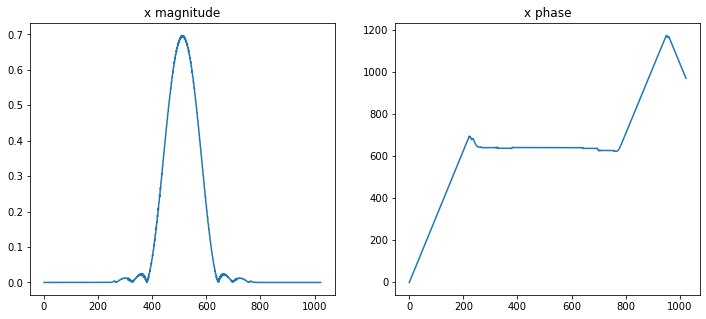

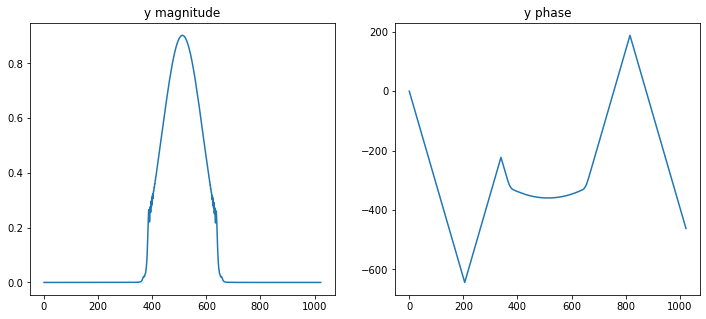

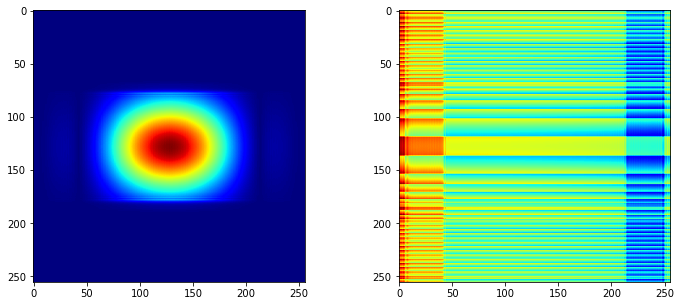

In [21]:
##### phase for the perfect case
# 1D
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.abs(b2_p.wavex))
plt.title('x magnitude')

plt.subplot(1,2,2)
plt.plot(np.unwrap(np.angle(b2_p.wavex)))
plt.title('x phase')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.abs(b2_p.wavey))
plt.title('y magnitude')

plt.subplot(1,2,2)
plt.plot(np.unwrap(np.angle(b2_p.wavey)))
plt.title('y phase')

# 2D
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(mono_beamline_p.im_out.complex_beam()[0]), cmap='jet')
plt.subplot(1,2,2)
plt.imshow(np.unwrap(np.angle(mono_beamline_p.im_out.complex_beam()[0])), cmap='jet')


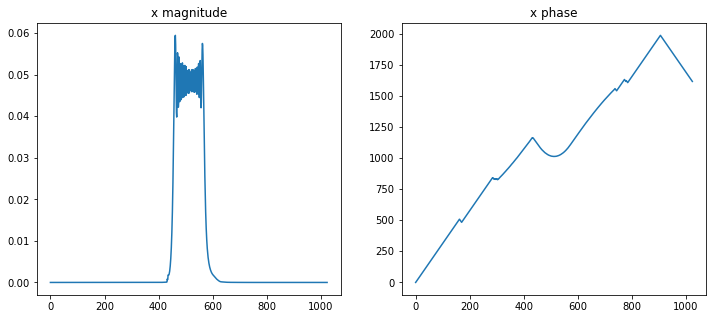

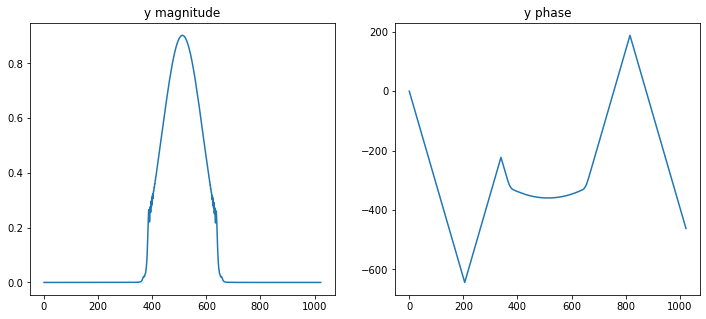

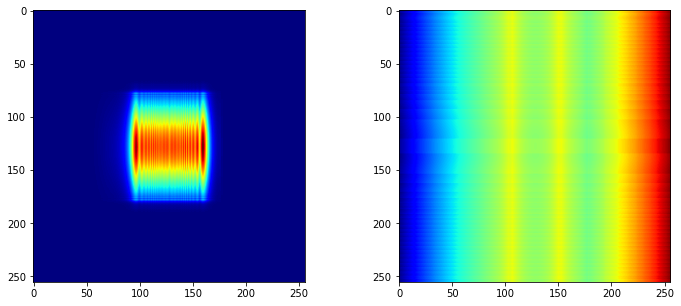

In [22]:
##### phase for the perfect case
# 1D
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.abs(b2_e.wavex))
plt.title('x magnitude')

plt.subplot(1,2,2)
plt.plot(np.unwrap(np.angle(b2_e.wavex)))
plt.title('x phase')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.abs(b2_e.wavey))
plt.title('y magnitude')

plt.subplot(1,2,2)
plt.plot(np.unwrap(np.angle(b2_e.wavey)))
plt.title('y phase')

# 2D
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(mono_beamline_e.im_out.complex_beam()[0]), cmap='jet')
plt.subplot(1,2,2)
plt.imshow(np.unwrap(np.angle(mono_beamline_e.im_out.complex_beam()[0])), cmap='jet')


In [16]:
import winsound
winsound.Beep(1500, 3000)